# ARIMA

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [3]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
df.columns = ['month','milk in pounds per cow']

In [5]:
df.tail()

,month,milk in pounds per cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [6]:
df.drop(168,axis=0,inplace=True)

In [7]:
df['month'] = pd.to_datetime(df['month'])

In [8]:
df.head()

,month,milk in pounds per cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [9]:
df.set_index('month',inplace=True)

In [10]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='month', length=168, freq=None)

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
milk in pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


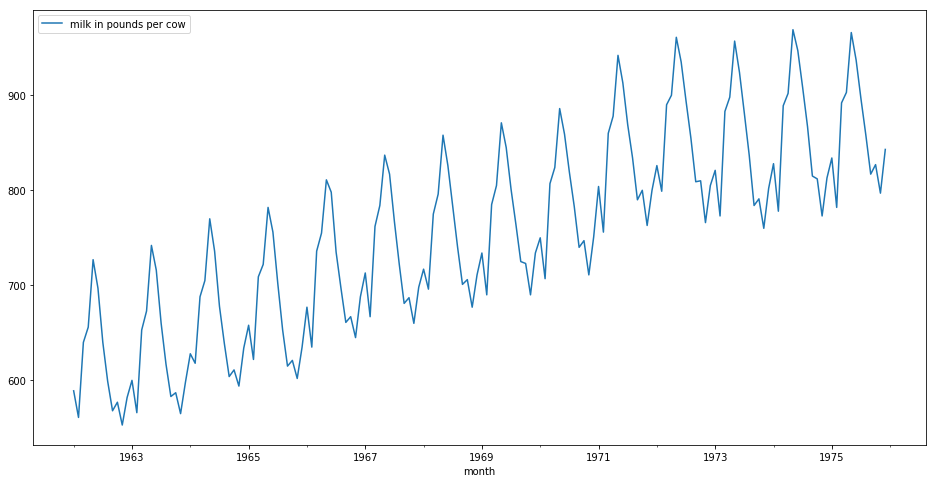

In [16]:
df.plot(figsize=(16,8))

In [17]:
time_series = df['milk in pounds per cow']

In [18]:
type(time_series)

pandas.core.series.Series

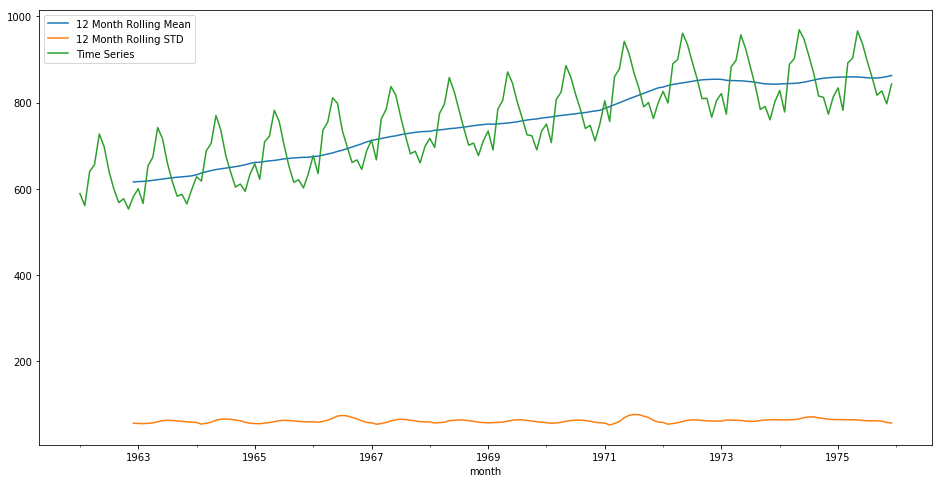

In [21]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean',figsize=(16,8))
time_series.rolling(12).std().plot(label='12 Month Rolling STD',figsize=(16,8))
time_series.plot(label='Time Series',figsize=(16,8))
plt.legend()

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
decomp = seasonal_decompose(time_series)

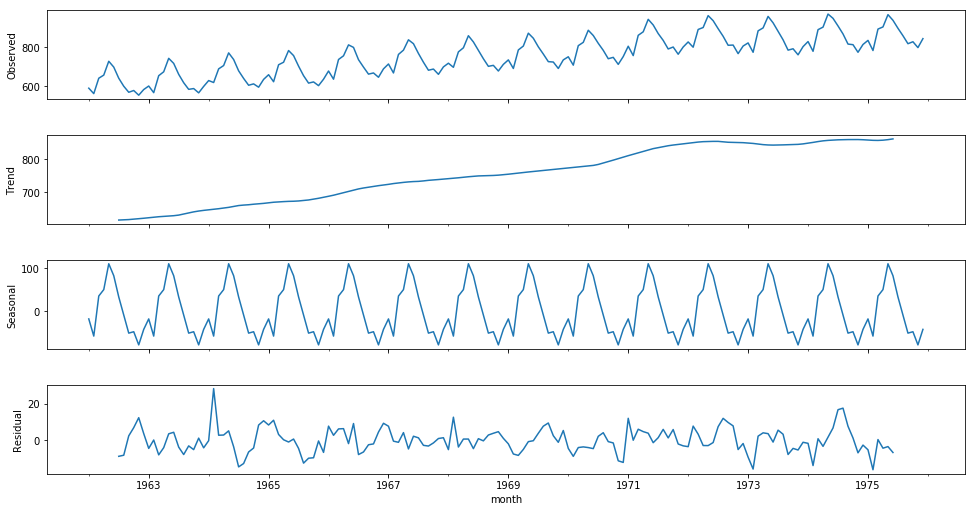

In [26]:
fig = decomp.plot()
fig.set_size_inches(15,8)

In [27]:
df.head()

,milk in pounds per cow
month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
result = adfuller(df['milk in pounds per cow'])

In [31]:
def adf_check(time_series):
    result = adfuller(time_series)
    print(" Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic','p-value','# of lags','N Observations Used']
    
    for value,label in zip(result,labels):
        print(label + ' : ' + str(value))
        
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis.')
        print('reject the null hypothesis.')
        print('Data has no unit root and is stationary.')
    else:
        print('Weak evidence against the null hypothesis.')
        print('Fail to reject the null hypothesis.')
        print('Data has a unit root, it is non-stationary.')

In [32]:
adf_check(df['milk in pounds per cow'])

 Augmented Dicky-Fuller Test
ADF Test Statistic : -1.30381158742
p-value : 0.627426708603
# of lags : 13
N Observations Used : 154
Weak evidence against the null hypothesis.
Fail to reject the null hypothesis.
Data has a unit root, it is non-stationary.


In [33]:
df['first difference'] = df['milk in pounds per cow'] - df['milk in pounds per cow'].shift(1)

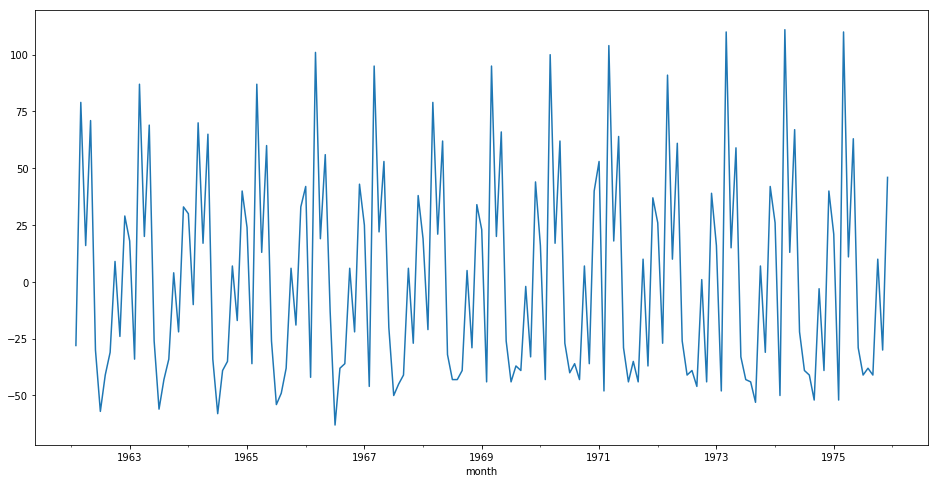

In [37]:
df['first difference'].plot(figsize=(16,8))

In [38]:
adf_check(df['first difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -3.05499555865
p-value : 0.0300680040018
# of lags : 14
N Observations Used : 152
Strong evidence against the null hypothesis.
reject the null hypothesis.
Data has no unit root and is stationary.


In [39]:
df['second difference'] = df['first difference'] - df['first difference'].shift(1)

In [40]:
adf_check(df['second difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -14.3278736456
p-value : 1.11269893321e-26
# of lags : 11
N Observations Used : 154
Strong evidence against the null hypothesis.
reject the null hypothesis.
Data has no unit root and is stationary.


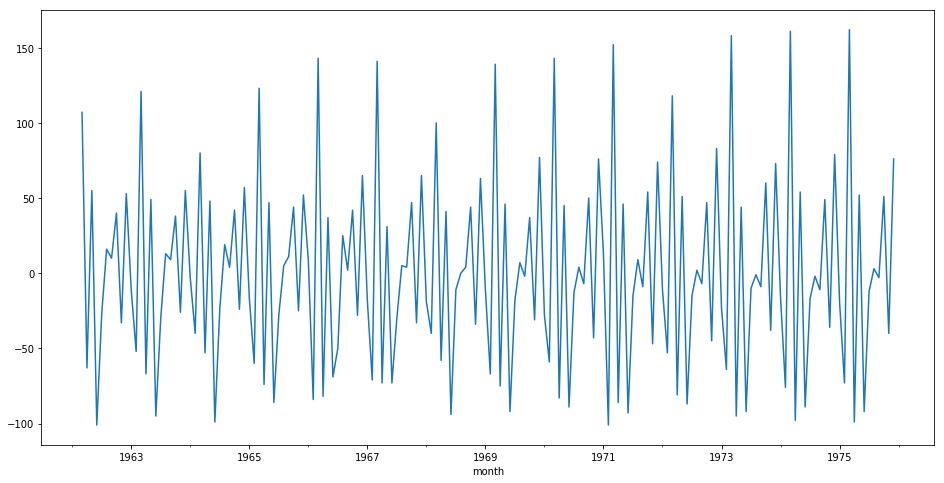

In [41]:
df['second difference'].plot(figsize=(16,8))

In [42]:
df['seasonal difference'] = df['milk in pounds per cow'] - df['milk in pounds per cow'].shift(12)

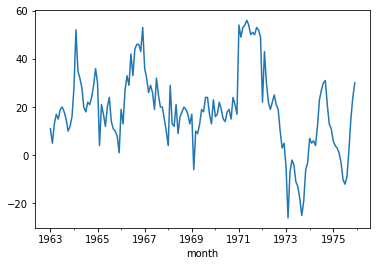

In [43]:
df['seasonal difference'].plot()

In [44]:
adf_check(df['seasonal difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -2.33541931436
p-value : 0.160798805277
# of lags : 12
N Observations Used : 143
Weak evidence against the null hypothesis.
Fail to reject the null hypothesis.
Data has a unit root, it is non-stationary.


In [47]:
df['seasonal first difference'] = df['first difference'] - df['first difference'].shift(12)

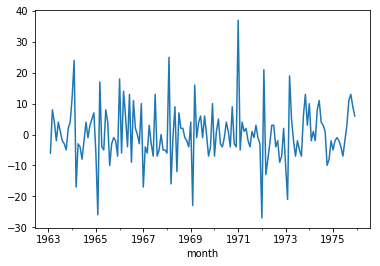

In [48]:
df['seasonal first difference'].plot()

In [49]:
adf_check(df['seasonal first difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -5.03800227492
p-value : 1.86542343188e-05
# of lags : 11
N Observations Used : 143
Strong evidence against the null hypothesis.
reject the null hypothesis.
Data has no unit root and is stationary.


In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

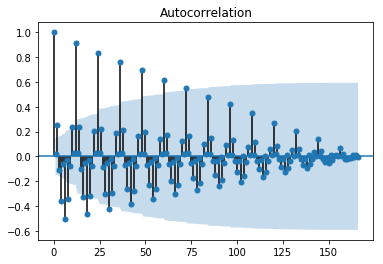

In [53]:
fig_first = plot_acf(df['first difference'].dropna())

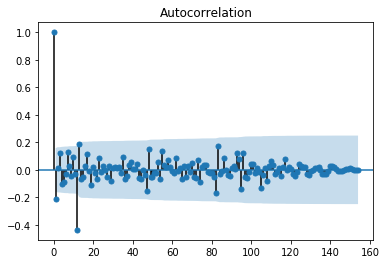

In [54]:
fig_seasonal_first = plot_acf(df['seasonal first difference'].dropna())

In [55]:
from pandas.plotting import autocorrelation_plot

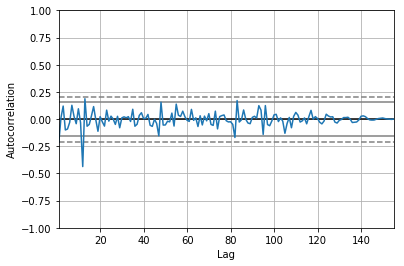

In [56]:
autocorrelation_plot(df['seasonal first difference'].dropna())

/usr/local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


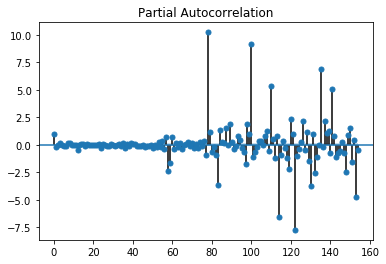

In [58]:
result = plot_pacf(df['seasonal first difference'].dropna())

/usr/local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


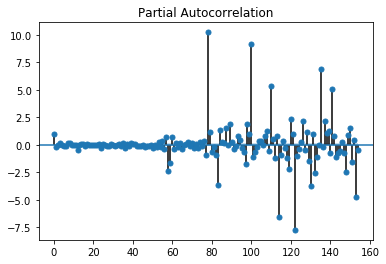

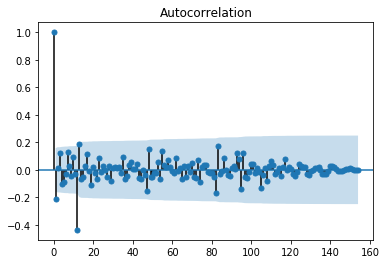

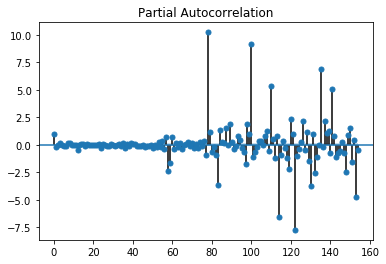

In [59]:
plot_acf(df['seasonal first difference'].dropna())
plot_pacf(df['seasonal first difference'].dropna())

In [60]:
from statsmodels.tsa.arima_model import ARIMA

In [62]:
model = sm.tsa.statespace.SARIMAX(df['milk in pounds per cow'],order=(0,1,0),seasonal_order=(1,1,1,12))

/usr/local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [63]:
results = model.fit()

In [65]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:             milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Wed, 19 Sep 2018   AIC                           1074.131
Time:                                    19:48:57   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

In [66]:
results.resid

month
1962-01-01    589.000000
1962-02-01    -28.000000
1962-03-01     79.000000
1962-04-01     16.000000
1962-05-01     71.000000
1962-06-01    -30.000000
1962-07-01    -57.000000
1962-08-01    -41.000000
1962-09-01    -31.000000
1962-10-01      9.000000
1962-11-01    -24.000000
1962-12-01     29.000000
1963-01-01   -276.500828
1963-02-01     -6.001008
1963-03-01      8.002845
1963-04-01      4.000576
1963-05-01     -1.997443
1963-06-01      3.998920
1963-07-01      0.997947
1963-08-01     -2.001476
1963-09-01     -3.001116
1963-10-01     -4.999676
1963-11-01      1.999136
1963-12-01      4.001044
1964-01-01     11.980057
1964-02-01     21.216689
1964-03-01    -13.288290
1964-04-01     -1.144499
1964-05-01     -4.926559
1964-06-01     -6.145193
                 ...    
1973-07-01      0.055663
1973-08-01     -6.173434
1973-09-01     -9.576197
1973-10-01      2.410418
1973-11-01      6.632694
1973-12-01      3.259520
1974-01-01      0.696353
1974-02-01     -9.375255
1974-03-01     10.3

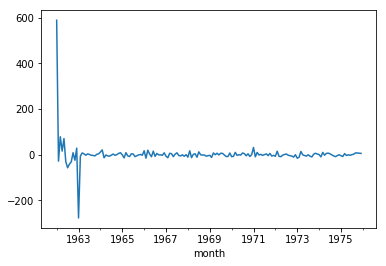

In [67]:
results.resid.plot()

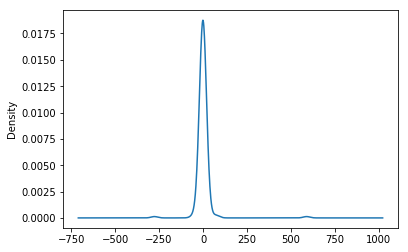

In [68]:
results.resid.plot(kind='kde')

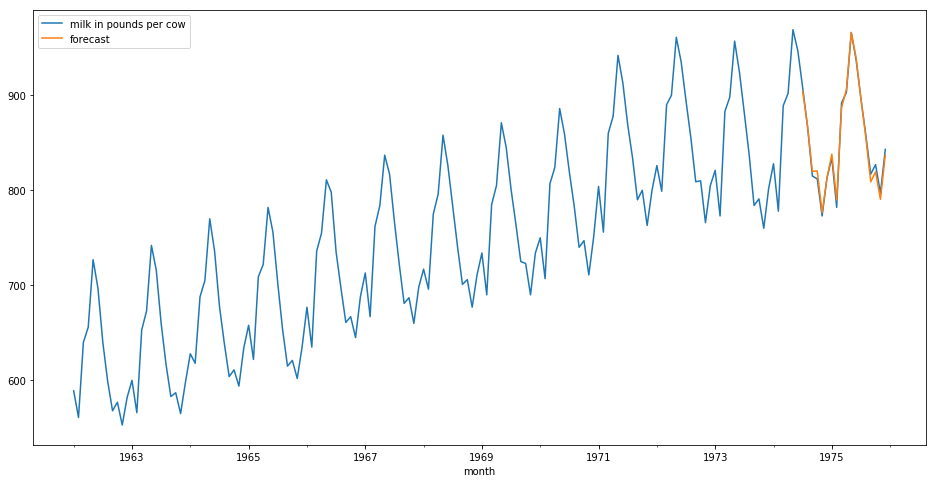

In [69]:
df['forecast'] = results.predict(start=150,end=168)
df[['milk in pounds per cow','forecast']].plot(figsize=(16,8))

In [70]:
df.tail()

,milk in pounds per cow,first difference,second difference,seasonal difference,seasonal first difference,forecast
month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358648
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841372
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323185
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427530
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063622


In [71]:
from pandas.tseries.offsets import DateOffset

In [73]:
future_date = [df.index[-1] + DateOffset(months=x) for x in range(1,24)]

In [75]:
future_date

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [76]:
future_df = pd.DataFrame(index=future_date,columns=df.columns)

In [77]:
future_df

,milk in pounds per cow,first difference,second difference,seasonal difference,seasonal first difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
final_df = pd.concat([df,future_df])

In [79]:
final_df.tail()

,milk in pounds per cow,first difference,second difference,seasonal difference,seasonal first difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
final_df['forecast'] = results.predict(start=168,end=192)

In [81]:
final_df.tail()

,milk in pounds per cow,first difference,second difference,seasonal difference,seasonal first difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.525867
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918956
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881181
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027294
1977-11-01,NaN,NaN,NaN,NaN,NaN,836.962995


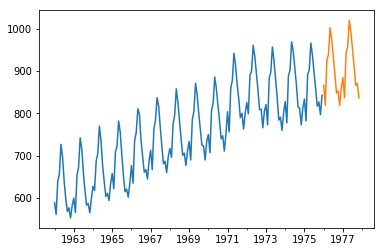

In [82]:
final_df['milk in pounds per cow'].plot()
final_df['forecast'].plot()